In [1]:
from rs.utils import utils
from rs.envs import engine
import os
from typing import List, Tuple, Optional
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"  # to avoid memory fragmentation
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import tensorflow as tf

policy = tf.keras.mixed_precision.Policy("mixed_bfloat16")
tf.keras.mixed_precision.set_global_policy(policy)
tf.config.experimental.set_memory_growth(
    tf.config.experimental.list_physical_devices("GPU")[0], True
)
tf.random.set_seed(0)
import math
import numpy as np
import mitsuba as mi
import drjit as dr
import sionna.rt
from sionna.rt import (
    load_scene,
    PlanarArray,
    Transmitter,
    Receiver,
    Camera,
    PathSolver,
    ITURadioMaterial,
    SceneObject,
    PathSolver,
    RadioMapSolver,
    DirectivePattern,
    Paths,
    RadioMap,
)
import time


E0000 00:00:1744666658.224026  176407 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744666658.231312  176407 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744666658.248645  176407 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744666658.248684  176407 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744666658.248687  176407 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744666658.248690  176407 computation_placer.cc:177] computation placer already registered. Please check linka

In [2]:
class Config:
    seed: int = 0
    ep_len: int = 1000
    eval_ep_len: int = 1000
    eval_seed: int = 0
    env_id: str = "wireless-sigmap-v0"
    sionna_config_file: str = "/home/hieule/research/rs/configs/sionna_shared_ap.yaml"
    viz_scene_path = "/home/hieule/research/rs/local_assets/blender/shared_ap_0/idx/scenee.xml"
    compute_scene_path = (
        "/home/hieule/research/rs/local_assets/blender/shared_ap_0/ceiling_idx/scenee.xml"
    )

    num_envs: int = 2
    name: str = "sac"
    load_replay_buffer: str = (
        "/home/hieule/research/saris/local_assets/replay_buffers/TD3__L_shape_static__wireless-sigmap-v0__0865b983"
    )
    buffer_size: int = int(100000)
    batch_size: int = 256

config = Config()
sionna_config = utils.load_config(config.sionna_config_file)

In [3]:
config = Config()
sionna_config = utils.load_config(config.sionna_config_file)
sionna_config["rendering"] = True
sionna_config["viz_scene_path"] = config.viz_scene_path
sionna_config["compute_scene_path"] = config.compute_scene_path
sig_map = engine.SignalCoverage(sionna_config, 1)
rm = sig_map.compute_cmap()
# paths = sig_map.compute_paths()

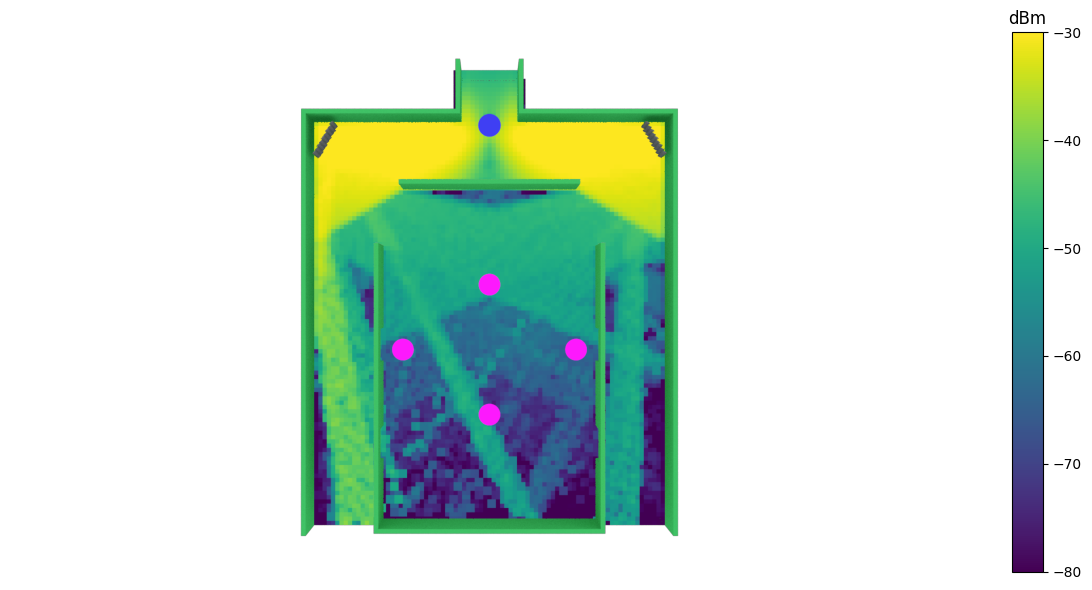

In [4]:
sig_map.render(radio_map=rm)

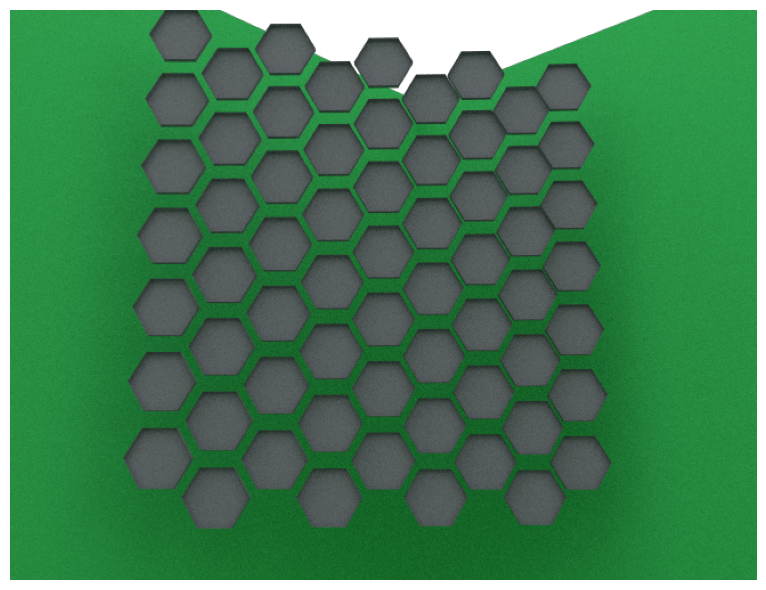

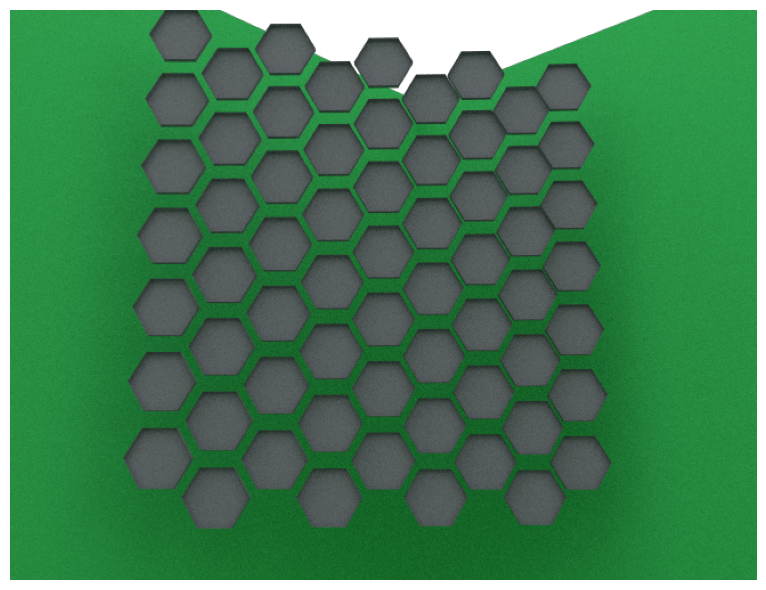

In [5]:
cam = Camera(position=[-5.2,7.2,2], look_at=[-7.4,9.5,2.7])
sig_map.viz_scene.render(camera=cam)

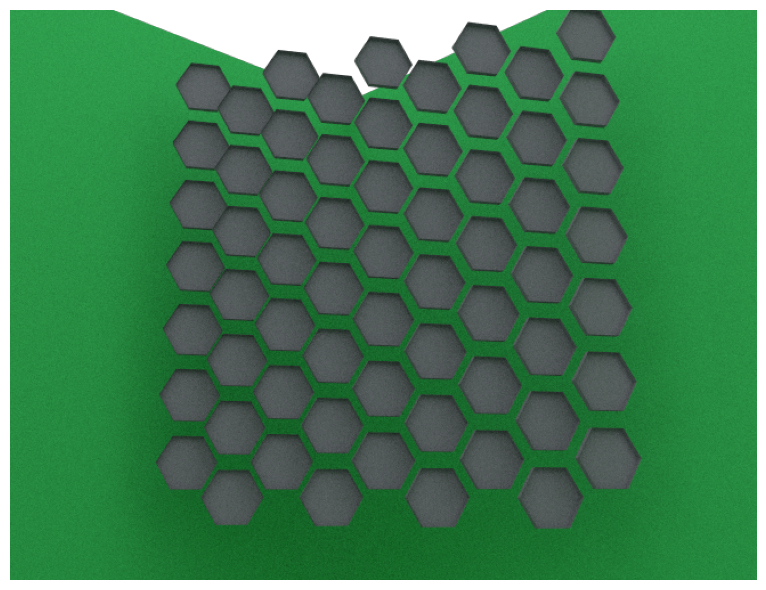

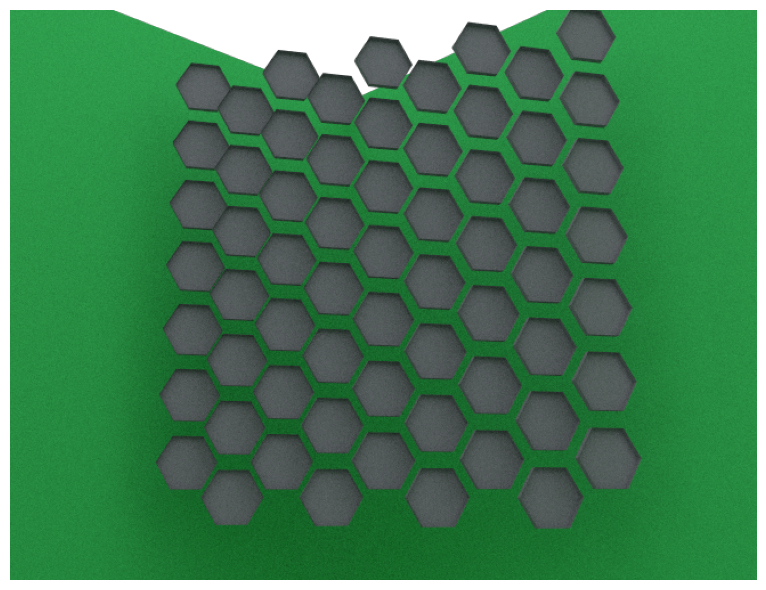

In [6]:
cam = Camera(position=[5.2,7.2,2], look_at=[7.4,9.5,2.7])
sig_map.viz_scene.render(camera=cam)

In [7]:
sig_map.viz_scene.preview(show_orientations=True)


Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, …